# stock prediction using LSTM

## Importing the required libraries





In [23]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Downloading google stock data using yfinance 

In [24]:
data = yf.download("GOOGL" , start = "2019-01-01" , interval = '1d')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,51.360001,53.039501,51.264000,52.734001,52.734001,31868000
2019-01-03,52.533501,53.313000,51.118500,51.273499,51.273499,41960000
2019-01-04,52.127998,54.000000,51.842999,53.903500,53.903500,46022000
2019-01-07,54.048500,54.134998,53.132000,53.796001,53.796001,47446000
2019-01-08,54.299999,54.667500,53.417500,54.268501,54.268501,35414000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 940 entries, 2019-01-02 to 2022-09-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       940 non-null    float64
 1   High       940 non-null    float64
 2   Low        940 non-null    float64
 3   Close      940 non-null    float64
 4   Adj Close  940 non-null    float64
 5   Volume     940 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 51.4 KB


In [26]:
# checking for any duplicate values
data.duplicated().any()

False

In [27]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')

In [28]:
data.isnull().sum().sum()

0

In [29]:
# Get the statistics of the data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,940.000000,940.000000,940.000000,940.000000,940.000000,9.400000e+02
mean,92.903112,93.909164,91.890089,92.927841,92.927841,3.403746e+07
std,31.177599,31.461207,30.793943,31.108851,31.108851,1.556808e+07
min,51.360001,52.500000,50.443501,51.273499,51.273499,9.312000e+06
25%,63.215249,63.779499,62.582000,63.175625,63.175625,2.413200e+07
50%,86.296249,87.252499,85.433002,86.379498,86.379498,3.041100e+07
75%,119.183249,120.212376,117.889877,119.026377,119.026377,3.842050e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.331780e+08


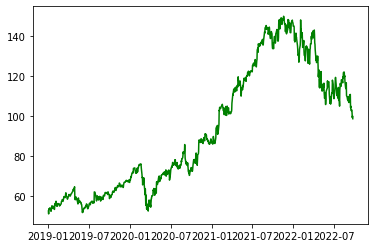

In [30]:
# plot the 'Close' feature  
plt.plot(data.index, data['Close'], color = 'green', label = 'Close')
plt.show()

## Data processing

In [31]:
# saving 'Close' feature in a variable name dataV1, since we only need that
dataV1 = data.iloc[:,3:4]
dataV1 = dataV1.values
dataV1.shape

(940, 1)

In [32]:
from sklearn.preprocessing import MinMaxScaler

# normalizing the data
Scaler = MinMaxScaler(feature_range=(0,1))
dataV1 = Scaler.fit_transform(dataV1)
dataV1.shape

(940, 1)

In [33]:
# declaring feature length
feature_length = 100

In [34]:
# Function to create x and y data
def Create_Features_and_Targets(data, feature_length):
  X = list()
  Y = list()
  for i in range(len(data) - feature_length -1):
  # for i in range(len(data) - feature_length):
    X.append(data[i:(i + feature_length), 0])
    Y.append(data[i + feature_length, 0])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y

In [35]:
X_train, y_train = Create_Features_and_Targets(dataV1, feature_length)

In [36]:
# Making data 3 dimensional
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [37]:
X_train.shape, y_train.shape

((839, 100, 1), (839,))

## Creating the model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM

In [39]:
# model
model = Sequential([
    LSTM(100, return_sequences = True, input_shape =(X_train.shape[1],1)),
    Dropout(0.3),

    LSTM(100, return_sequences = False),
    Dropout(0.3),
    Dense(1),
])
model.compile(optimizer='adam',loss="mean_squared_error")

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 100)          40800     
                                                                 
 dropout_2 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Training the model
history = model.fit(
    X_train, 
    y_train, 
    epochs = 100, 
    batch_size = 12, 
    verbose=1,
)

Epoch 1/100
70/70 [==============================] - 16s 178ms/step - loss: 0.0173
Epoch 2/100
70/70 [==============================] - 13s 179ms/step - loss: 0.0045
Epoch 3/100
70/70 [==============================] - 8s 120ms/step - loss: 0.0041
Epoch 4/100
70/70 [==============================] - 8s 121ms/step - loss: 0.0042
Epoch 5/100
70/70 [==============================] - 8s 118ms/step - loss: 0.0034
Epoch 6/100
70/70 [==============================] - 8s 118ms/step - loss: 0.0036
Epoch 7/100
70/70 [==============================] - 8s 119ms/step - loss: 0.0034
Epoch 8/100
70/70 [==============================] - 8s 119ms/step - loss: 0.0036
Epoch 9/100
70/70 [==============================] - 8s 120ms/step - loss: 0.0031
Epoch 10/100
70/70 [==============================] - 8s 120ms/step - loss: 0.0038
Epoch 11/100
70/70 [==============================] - 8s 119ms/step - loss: 0.0028
Epoch 12/100
70/70 [==============================] - 8s 119ms/step - loss: 0.0032
Epoch 13/10

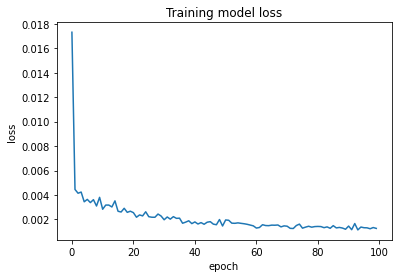

In [42]:
# plotting the loss from the training model
plt.plot(history.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## Testing and making predictions

In [43]:
testData = data.iloc[:,3:4] # Get 'Close' feature
y_real = testData.iloc[feature_length+1:,0:].values # Actual Stock values
x_test = testData.iloc[:,0:].values  # values from whole data to test
y_real.shape, x_test.shape

((839, 1), (940, 1))

In [44]:
# normalizing the Data using Scaler.transform function
x_test = Scaler.transform(x_test)
x_test.shape

(940, 1)

In [45]:
x_test, y_test = Create_Features_and_Targets(x_test, feature_length)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1)) # Making data 3 dimensional 
x_test.shape

(839, 100, 1)

In [46]:
# making predictions
y_pred = model.predict(x_test)

In [47]:
predicted_price = Scaler.inverse_transform(y_pred)

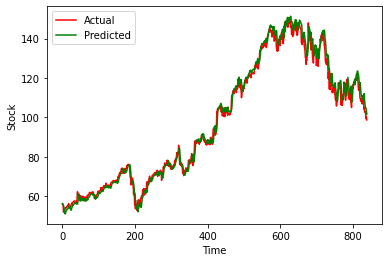

In [48]:
# plotting the Actual Stock Price and the Predicted Stock Price
plt.plot(y_real, color = 'red', label = 'Actual')
plt.plot(predicted_price, color = 'green', label = 'Predicted')

plt.xlabel('Time')
plt.ylabel('Stock')
plt.legend()
plt.show()

## Real-time predictions

In [49]:
def predict_given_date(data, date, feature_length):
  idx = data.index.get_loc(date)
  close_col = data.iloc[:,3:4]
  close_col = close_col.iloc[idx - feature_length : idx,:].values
  close_col = np.expand_dims(Scaler.transform(close_col) , axis = 0)
  Prediction = model.predict(close_col)
  Prediction = Scaler.inverse_transform(Prediction)
  return Prediction

In [52]:
predict_given_date(data, '2022-09-20', feature_length) 

array([[101.7007]], dtype=float32)

Here we can see our model predicted '101.7007' to the given data which is 2022-09-20, well lets check if its any closer to the actuval price value of that given date. This peace of code do just that.

In [54]:
l = data.index.get_loc('2022-09-20')
data.iloc[l: l+1,:]['Close']
# well we can see the predicted value is very close

Date
2022-09-20    101.139999
Name: Close, dtype: float64